# 1. Importing necessary libraries

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

# 2. Import Dataset

In [57]:
df = pd.read_csv('Wholesale customers data.csv', index_col=0)

df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,,,,,,,
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185


In [9]:
df.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [10]:
df.shape

(440, 7)

<AxesSubplot:>

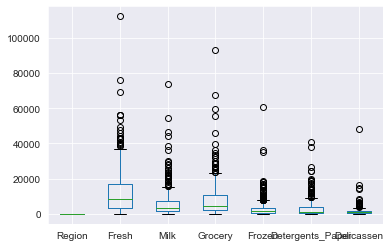

In [11]:
 df.boxplot()

C:\Users\ds\anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

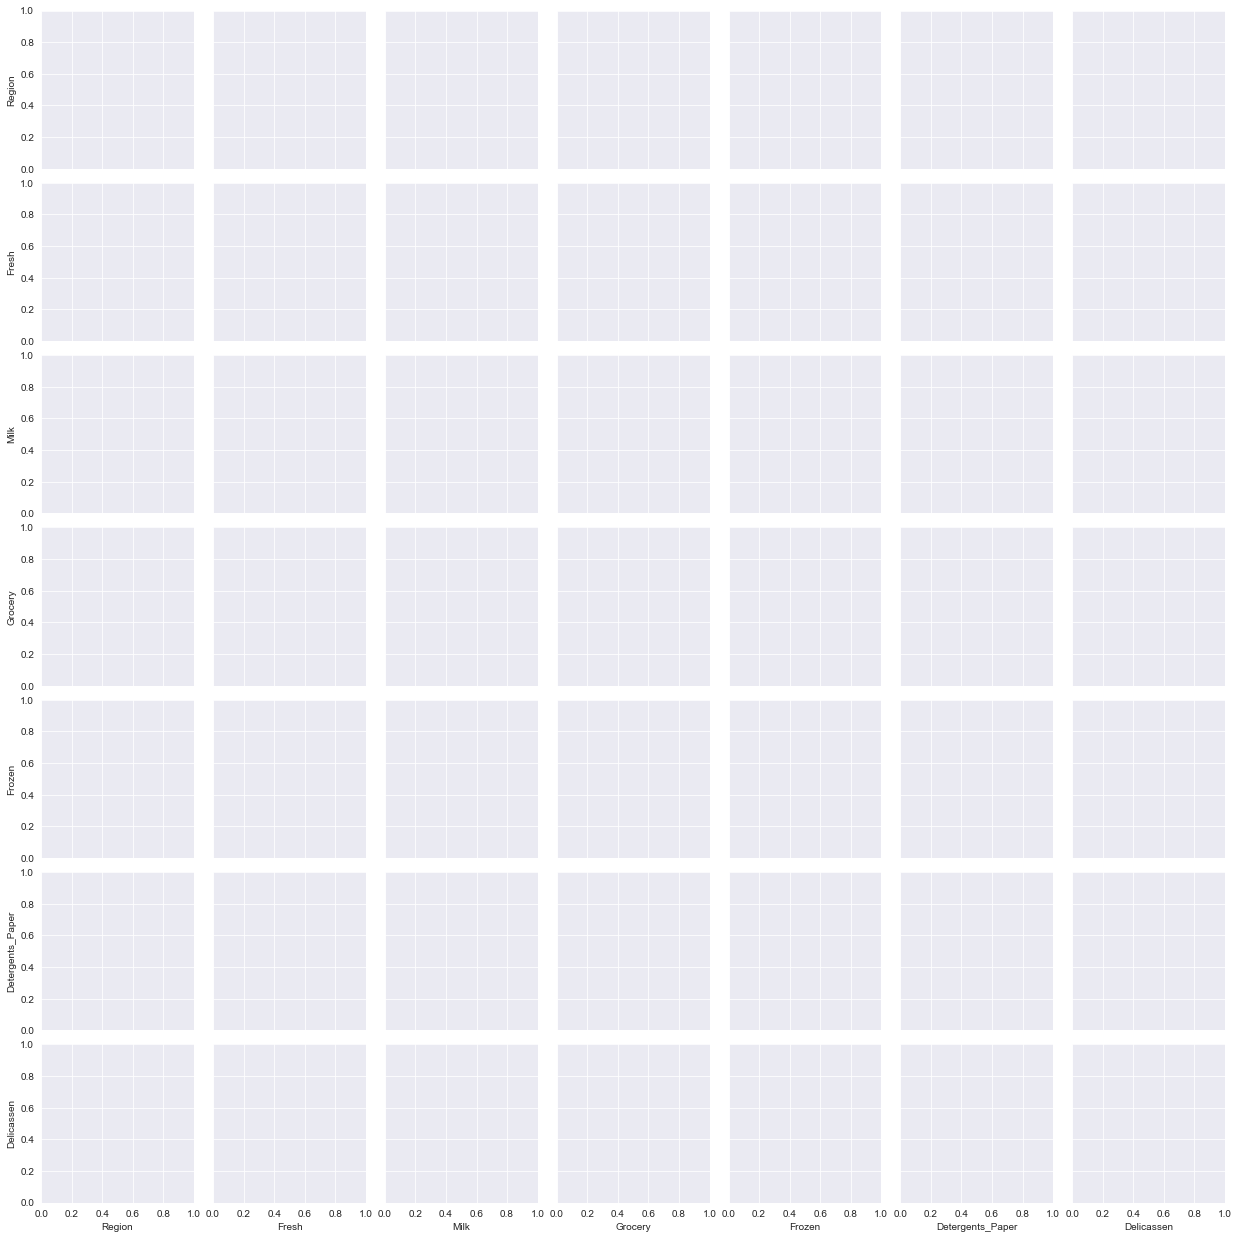

In [12]:
sns.pairplot(df)

In [ ]:
plt.boxplot(df['Fresh'], vert=False, patch_artist=True, notch = True)
plt.show()

In [ ]:
sns.boxplot(x = df['Fresh'])

In [ ]:
df

# 3. Feature scaling

In [19]:

from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 0.59066829,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 0.59066829, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 0.59066829, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 0.59066829,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [ 0.59066829, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [ 0.59066829, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

# 4 Model Building-Outlier Detection

In [21]:
from sklearn.cluster import DBSCAN  

In [24]:
db = DBSCAN(eps=0.5, min_samples=3)

y = db.fit_predict(x)
y

array([ 0,  1, -1,  2, -1,  0,  2,  3,  2, -1, -1,  2, -1, -1, -1,  2,  3,
       16,  0,  2,  0,  2, -1, -1, -1,  2,  2,  2, -1,  4,  0,  2,  2, -1,
        2,  3, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  2,
        2, -1,  3,  2,  2, -1,  3,  2,  3,  2, -1, -1,  5,  2, -1,  6, -1,
       -1,  2, -1, -1, -1, -1,  3,  2, -1, -1,  2,  2,  2,  3,  1,  2,  2,
       -1, -1, -1,  2, -1,  2,  2, -1, -1,  3,  2,  6,  2,  2,  2, -1, -1,
        3, -1,  2,  2,  3,  5,  2, -1,  2, -1, -1,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, -1,  7, -1,  2,  0, -1,  4,  2,  2,  2,  2,  2,  2,
       -1,  2, -1,  2,  0, -1, -1,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,
       -1,  2, -1, -1,  2,  3,  3,  3,  2,  2, -1, -1, -1,  3,  2,  2,  2,
        3, -1,  2, -1,  2,  3, -1, -1, -1, -1,  0, -1,  3, -1,  2, -1,  2,
       -1, -1,  3, -1,  2,  2, -1,  2, -1, -1,  8, -1,  9, -1, -1, -1,  9,
        9, -1,  9, -1,  8, -1,  9, -1,  9,  8,  8, -1, -1,  9, -1,  9,  9,
       -1, 10, -1,  9,  9

In [54]:
x

array([[ 0.59066829,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 0.59066829, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 0.59066829, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 0.59066829,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [ 0.59066829, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [ 0.59066829, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

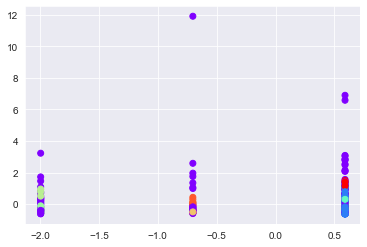

In [55]:
plt.scatter(x[:,0],x[:,4],c = y,cmap = 'rainbow')

In [26]:
from sklearn.metrics import silhouette_score

# Hyperparameter tuning

# Selecting Min_samples:
1. Number of columns + 1
2. Number of columns * 2
3. Always keep min_sample at least 3

# Finding out the best eps value(K-dist Plot)
- This technique calculates the average distance between each point and its k nearest neighbors, where k is the MinPts value you selected. 
- The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).


1. Choose k: Set  𝑘
k to be the minimum number of points required to form a dense region. A common choice is 𝑘 = MinPoints
minPts is the minimum number of points parameter in DBSCAN.

2. Compute k-Nearest Neighbors distances: For each point in the dataset, compute the distance to its k-th nearest neighbor.

3. Sort and plot distances: Sort these distances in ascending order and plot them. The optimal 𝜖 is typically at the "elbow" of this plot, where the distance starts to increase significantly.

In [32]:
from sklearn.neighbors import NearestNeighbors

In [33]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)

In [34]:
neigh.kneighbors(x)

(array([[0.        , 0.46098501, 0.49746796],
        [0.        , 0.43048153, 0.43131993],
        [0.        , 1.2507466 , 1.53289789],
        ...,
        [0.        , 0.81088341, 1.05002533],
        [0.        , 0.31430896, 0.33460941],
        [0.        , 0.1811683 , 0.26121553]]),
 array([[  0,   5, 281],
        [  1,  82, 396],
        [  2, 409,  17],
        ...,
        [437,  77, 163],
        [438, 429, 161],
        [439,  34, 355]], dtype=int64))

In [35]:
d,index = neigh.kneighbors(x)

In [36]:
d

array([[0.        , 0.46098501, 0.49746796],
       [0.        , 0.43048153, 0.43131993],
       [0.        , 1.2507466 , 1.53289789],
       ...,
       [0.        , 0.81088341, 1.05002533],
       [0.        , 0.31430896, 0.33460941],
       [0.        , 0.1811683 , 0.26121553]])

In [37]:
d[:,1]

array([ 0.46098501,  0.43048153,  1.2507466 ,  0.32193368,  0.81980385,
        0.39751095,  0.34271218,  0.30537987,  0.24101484,  0.49473973,
        0.55646534,  0.17770256,  0.77328812,  0.54828334,  0.74054188,
        0.28672635,  0.28556562,  0.40142637,  0.41860312,  0.4143153 ,
        0.42189667,  0.20790424,  0.89470417,  4.62909095,  1.11479524,
        0.43841226,  0.15707717,  0.22438604,  0.59907909,  0.4476474 ,
        0.46751181,  0.1824026 ,  0.21968274,  0.64405001,  0.15148845,
        0.44526309,  0.74938184,  0.6473125 ,  0.78468891,  1.28988619,
        0.89470417,  0.42189667,  0.68247231,  0.68377801,  0.54717396,
        0.59907909,  0.63397234,  2.98810434,  0.54717396,  0.85031661,
        0.42610885,  0.28516416,  0.59069346,  0.39926439,  0.44295188,
        0.24101484,  1.47278754,  0.3115813 ,  0.20125878,  0.38982995,
        0.38307211,  2.98810434,  0.55346622,  0.33415256,  0.32140915,
        2.61324016,  0.19710987,  0.54828334,  0.57848917,  0.20

In [38]:
distance = np.sort(d[:,1])
distance

array([ 0.04438185,  0.04438185,  0.05323769,  0.05323769,  0.07562688,
        0.07562688,  0.09708669,  0.09708669,  0.10153954,  0.1138444 ,
        0.1138444 ,  0.11524265,  0.11524265,  0.11965484,  0.11965484,
        0.12722269,  0.13150813,  0.13150813,  0.13861662,  0.13861662,
        0.14768382,  0.14768382,  0.15148845,  0.15148845,  0.15208043,
        0.15208043,  0.15392478,  0.15392478,  0.15707717,  0.15707717,
        0.15738395,  0.16092861,  0.16095334,  0.16095334,  0.16525716,
        0.16525716,  0.16752299,  0.16869486,  0.16869486,  0.16952993,
        0.16970611,  0.17425983,  0.17425983,  0.17770256,  0.17770256,
        0.17889164,  0.17923775,  0.1811683 ,  0.1824026 ,  0.1824026 ,
        0.18464419,  0.18476049,  0.18497901,  0.18497901,  0.18617943,
        0.18617943,  0.19283387,  0.19496721,  0.1949709 ,  0.19502715,
        0.19710987,  0.20125878,  0.20125878,  0.20469869,  0.20790424,
        0.20790424,  0.20941286,  0.20992692,  0.20992692,  0.21

Text(0.5, 1.0, 'K-Distance Graph')

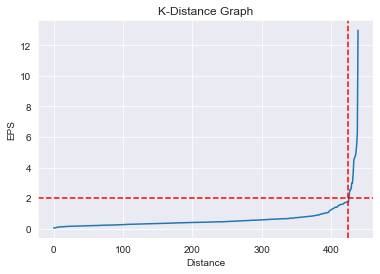

In [52]:
plt.plot(distance)
plt.axhline(y=2, linestyle = '--', color = 'red')#horrizontal Axis
plt.axvline(x=425, linestyle = '--', color = 'red')#Vertical Axis
plt.xlabel('Distance')
plt.ylabel('EPS')
plt.title('K-Distance Graph')

# Evaluate the model

In [56]:
db = DBSCAN(eps=2.,min_samples=3)
yp = db.fit_predict(x)
yp

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

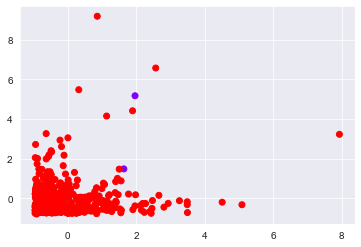

In [41]:
plt.scatter(x[:,1],x[:,2],c = yp, cmap='rainbow')

In [42]:
silhouette_score(x,yp)

0.8125564946669382

In [43]:
#Analyze the clusters

In [43]:
df['Cluster'] = yp
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
Channel,,,,,,,,
2,3,12669,9656,7561,214,2674,1338,0
2,3,7057,9810,9568,1762,3293,1776,0
2,3,6353,8808,7684,2405,3516,7844,0
1,3,13265,1196,4221,6404,507,1788,0
2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...
1,3,29703,12051,16027,13135,182,2204,0
1,3,39228,1431,764,4510,93,2346,0
2,3,14531,15488,30243,437,14841,1867,0


In [45]:
df['Cluster'].value_counts()

 0    438
-1      2
Name: Cluster, dtype: int64

In [46]:
df.groupby('Cluster').agg('mean')

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,
-1,2.500000,34782.000000,30367.000000,16898.000000,48701.500000,755.500000,26776.000000
0,2.543379,11896.271689,5684.070776,7910.424658,2863.577626,2891.200913,1409.568493


# The End